# Математическая статистика
## Практическое задание 3

В данном задании рассматриваются свойства условного математического ожидания. В частности, рассматривается модель смеси гауссовских распределений.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 1 балл
* Задача 3 - 2 балла
* Задача 4 - 7 баллов
* Задача 5<font size="5" color="red">\*</font> - 10 баллов

In [1]:
import numpy as np
import scipy.stats as sps, scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** На вероятностном пространстве $\left(\mathbb{R}_+, \mathcal{B}(\mathbb{R}_+), \mathsf{P}\right)$, где $\mathsf{P}$ --- экспоненциальное распределение с параметром $\lambda$, задана случайная величина $\xi$ по правилу $\xi(\omega) = \omega$. Cигма-алгебра $\mathcal{G}$ порождена счетной системой событий $\{B_n\}_{n\geq1},$ где $B_n = \{n-1\leq \omega<n\}.$. Для $\omega \in [0, 5]$ постройте графики 
* плотности распределения $\mathsf{P}$ для $\lambda \in \{1, 3, 10\}$
* $\xi$ и $\mathsf{E}(\xi | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$
* $\xi^2$ и $\mathsf{E}(\xi^2 | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$

Используйте приведенный ниже шаблон. Одному и тому же значению $\lambda$ во всех графиках должен соответствовать один и тот же цвет.

$\mathsf{E}(\xi | \mathcal{G}) = 
\sum_\limits{n \in \mathbb{N}} \frac{\mathsf{E} (\xi I_{\xi \in [n-1;n)})}{\mathsf{P}(\xi \in [n-1;n))} I_{B_n} = 
\frac{\int\limits_{n-1}^{n} x \lambda e^{-\lambda x} dx}{\int\limits_{n-1}^{n} \lambda e^{-\lambda x} dx }= 
\frac{\frac{1}{\lambda} \int_\limits{\lambda(n-1)}^{\lambda n} u e^{-u} du}{\int\limits_{\lambda(n-1)}^{\lambda n} e^{-u} du} = 
\frac{\frac{1}{\lambda} \int\limits_{\lambda(n-1)}^{\lambda n} u e^{-u} du}{\int\limits_{\lambda(n-1)}^{\lambda n} e^{-u} du} = \frac{\frac{1}{\lambda} (\lambda(-e^{-\lambda n}n+e^{-\lambda (n-1)}(n-1))-e^{-\lambda n}+e^{-\lambda (n-1)}}{e^{-\lambda (n-1)}-e^{\lambda n}}$

$\mathsf{E}(\xi^2 | \mathcal{G}) = 
\sum_\limits{n \in \mathbb{N}} \frac{\mathsf{E} (\xi^2 I_{\xi \in [n-1;n)})}{\mathsf{P}(\xi \in [n-1;n))} I_{B_n} = 
\frac{\int\limits_{n-1}^{n} x^2 \lambda e^{-\lambda x} dx}{\int\limits_{n-1}^{n} \lambda e^{-\lambda x} dx }=
\frac{-\frac{x^2 e^{-\lambda x}}{\lambda}\bigg\lvert_{n-1}^{n}+\frac{2}{\lambda}\int\limits_{n-1}^{n} x \lambda e^{-\lambda x} dx}{\int\limits_{n-1}^{n} \lambda e^{-\lambda x} dx }=
\frac{-\frac{n^2 e^{-\lambda n}}{\lambda}+\frac{(n-1)^2 e^{-\lambda (n-1)}}{\lambda}+\frac{2}{\lambda}\frac{1}{\lambda} (\lambda(-e^{-\lambda n}n+e^{-\lambda (n-1)}(n-1))-e^{-\lambda n}+e^{-\lambda (n-1)}}{e^{-\lambda (n-1)}-e^{\lambda n}}$

In [2]:
params = (
    (1, 'red'), 
    (3, 'green'), 
    (10, 'blue')
)

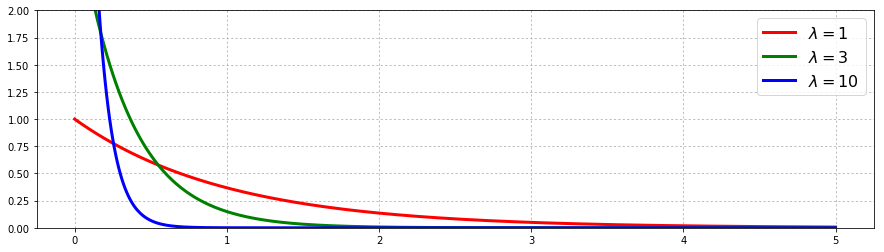

In [3]:
grid = np.linspace(0, 5, 500)
# График 1
plt.figure(figsize=(15, 4))
for l, color in params:
    plt.plot(grid, sps.expon.pdf(grid, scale=1/l), lw=3, color=color, label='$\\lambda={}$'.format(l))
plt.legend(fontsize=16)
plt.ylim((0, 2))
plt.grid(ls=':')

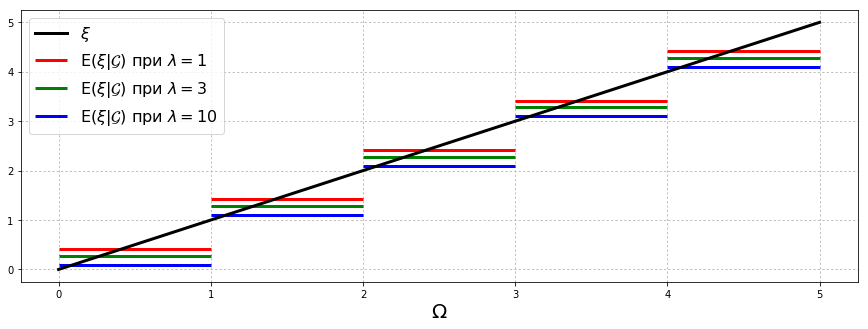

In [4]:
B = [i for i in range(0, 5)]

# График 2
plt.figure(figsize=(15, 5))
plt.plot(grid, grid, lw=3, label='$\\xi$', color='black')
for l, color in params:
    for i in B:  # события из сигма-алгебры
        a = i
        b = i+1
        Ex = -b*np.exp(-l*b)+a*np.exp(-l*a)-1/l*(np.exp(-l*b)-np.exp(-l*a))
        Px = np.exp(-l*a)-np.exp(-l*b)
        plt.hlines(xmin=i, xmax=(i+1), y=Ex/Px, color=color, lw=3,
                   label=('$\\mathsf{E}(\\xi|\\mathcal{G})$ при $\\lambda = ' + str(l) 
                          + '$') if i == 1 else '')
plt.xlabel('$\\Omega$', fontsize=20)
plt.legend(fontsize=16)
plt.grid(ls=':')

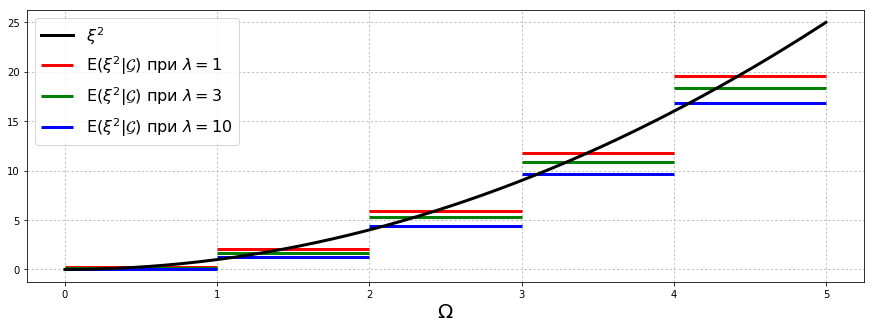

In [5]:
# График 3 для \xi^2 аналогичен графику 2
plt.figure(figsize=(15, 5))
plt.plot(grid, grid**2, lw=3, label='$\\xi^2$', color='black')
for l, color in params:
    for i in B:  # события из сигма-алгебры
        a = i
        b = i+1
        Ex2 = -(b**2 * np.exp(-l*b)-a**2 * np.exp(-l*a))\
            -2/l*(b*np.exp(-l*b)-a*np.exp(-l*a))\
            -2/l**2 * (np.exp(-l*b)-np.exp(-l*a))
        Px = np.exp(-l*a)-np.exp(-l*b)
        plt.hlines(xmin=i, xmax=(i+1), y=Ex2/Px, color=color, lw=3,
                   label=('$\\mathsf{E}(\\xi^2|\\mathcal{G})$ при $\\lambda = ' + str(l) 
                          + '$') if i == 1 else '')
plt.xlabel('$\\Omega$', fontsize=20)
plt.legend(fontsize=16)
plt.grid(ls=':')

**Вывод:**
Условное матожидание есть величина, содержащая некоторую информацию о распределении и по сути являющаяся усреднением по одному из элементов разбиения сигма-алгебры.

**Задача 2.** 
Пусть $\xi = (\xi_1, \xi_2) \sim \mathcal{N}(a, \Sigma)$, где $a=0$ и $\Sigma = \begin{pmatrix}10 & 8 \\ 8 & 10\end{pmatrix}$. Для $y \in \{-3, 0, 1, 5\}$ постройте графики условной плотности $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right)$.

$f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right) = \frac{f_{(\xi_1, \xi_2)} (x, y) }{f_{\xi_2}(y)}$

$ f_{(\xi_1, \xi_2)} (x, y) = \frac{e^{-\frac{1}{2}(x-\overline{a})^T \Sigma^{-1} (x-\overline{a})}}{\sqrt{|2 \pi \Sigma|}} = \frac{1}{2 \pi 6} e^{-\frac{1}{36}(5(x^2+y^2)-8xy)}$

$f_{\xi_2}(y) = \int \limits_{-\infty}^{\infty} f_{(\xi_1, \xi_2)} (x, y) dx = \frac{1}{12 \pi } e^{-\frac{y^2}{20}} 6\sqrt{\frac{\pi}{5}} = \frac{1}{2\sqrt{5 \pi}} e^{-\frac{y^2}{20}}$

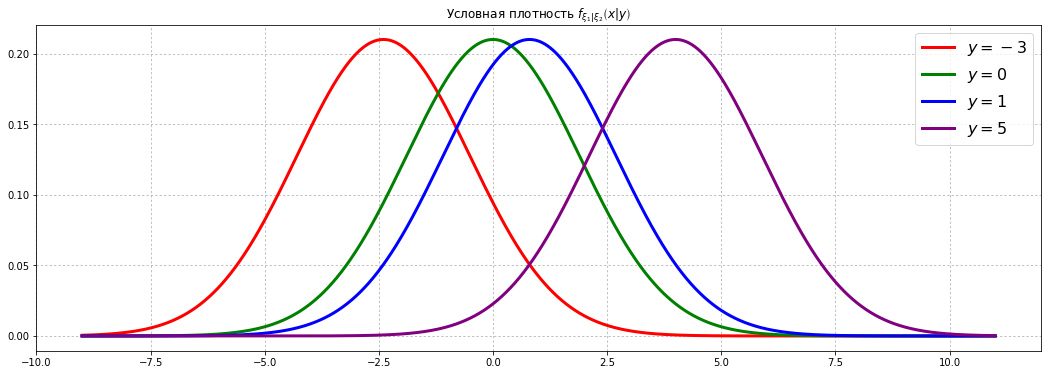

In [6]:
conditions = [
    (-3, 'red'),
    (0, 'green'),
    (1, 'blue'),
    (5, 'purple')
]

grid = np.linspace(-9, 11, 5000)
# График 1
plt.figure(figsize=(18, 6))
plt.title('Условная плотность $f_{\\left.\\xi_1\\right|\\xi_2} \\left(x\\left|y\\right.\\right)$')
for y, color in conditions:
    Pjoint = 1/(12*np.pi)*np.exp(-1/36*(5*(grid**2)+5*(y**2)-8*grid*y))
    Pxi_2 = 1/(2*np.sqrt(5*np.pi))*np.exp(-(y**2)/20)
    plt.plot(grid, Pjoint/Pxi_2, lw=3, color=color, label='$y={}$'.format(y))
plt.legend(fontsize=16)
#plt.ylim((0, 2))
plt.grid(ls=':')

**Вывод:**
Условная плотность сильно зависит от условия. По графику кажется, что на ширину кривой это влияет мало, но зато значительно влияет на сдвиг.

**Задача 3.**
Имеется множество серверов, которые периодически выходят из строя. 
Обозначим $\xi_i$ время между $i$-м моментом выхода из строя сервера и $(i+1)$-м.
Известно, что величины $\xi_i$ независимы в совокупности и имеют экспоненциальное распределение с параметром $\lambda$.

Обозначим $N_t$ --- количество серверов, которые вышли из строя к моменту времени $t$ (в начальный момент времени $N_0 = 0$).
В курсе случайных процессов будет доказано, что для любых $s < t$ величина $N_t - N_s \sim Pois(\lambda (t - s))$ и независима с $N_s$.
При этом $N_t$ как функция от $t$ будет называться пуассоновским процессом интенсивности $\lambda$.

Вам нужно знать, сколько серверов нужно докупить к моменту времени $t$ взамен вышедших из строя.
В момент времени $s$ предсказанием количества серверов, вышедших из строя к моменту времени $t$, будем считать величину $\mathsf{E}( N_t | N_s)$.

Сгенерируйте выборку случайных величин $\xi_i$ для $\lambda = 1/4$ в количестве, чтобы их сумма была больше 100.
Для $t=100$ постройте графики зависимости величины $\mathsf{E}( N_t | N_s)$ от $s$ в предополжении, что условное математическое ожидание было посчитано при значении $\lambda \in \{1/10, 1/4, 1/2, 1\}$. Нарисуйте также на графике горизонтальную прямую уровня $N_{100}$.

$\mathsf{E}( N_t | N_s) = \mathsf{E}( N_s + N_t - N_s | N_s) = \mathsf{E}( N_s | N_s) + \mathsf{E}( N_t - N_s | N_s) = \mathsf{E}(N_s)+ \mathsf{E}(N_t - N_s) = N_s + \lambda(t-s)$ (т. к. $N_s$ является $N_s$-измеримой и т. к. $N_t - N_s$ независима с $N_s$.

In [7]:
from statsmodels.distributions.empirical_distribution import ECDF

In [8]:
lambd = 1./4.
sum = 0
# Разницы во времени между выходом серверов из стороя
deltas = sps.expon.rvs(scale=1/lambd, size = 10)
while (deltas.sum() < 100):
    deltas = np.append(deltas, sps.expon.rvs(scale=1/lambd, size = 10))
print("%d значений с суммой %f"%(len(deltas), deltas.sum()))

sample = deltas.cumsum()
print(sample)

30 значений с суммой 105.782871
[   3.96986901   10.43318682   12.94121448   13.06275331   14.17508492
   14.81582322   17.85366966   20.21972593   21.44884279   23.97211429
   28.88698584   32.55147082   38.39922255   44.81839626   49.90871333
   58.18200424   62.53874942   64.8195506    66.68431116   80.05924999
   80.12447372   80.89319214   81.70772989   82.90085562   84.7888405
   90.34117645   94.39360852   96.93877456   98.4269854   105.78287097]


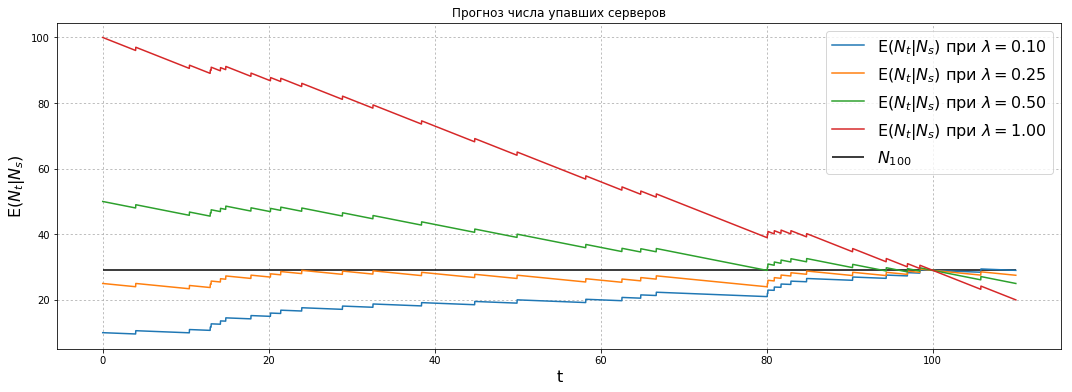

In [11]:
lambdas = [1/10, 1/4, 1/2, 1]
predicted_count = lambda t: ECDF(sample)(t)*len(sample)
conditional_expectation = lambda t, l : predicted_count(t)+l*(100-t)

grid = np.linspace(0, 110, 5000)
plt.figure(figsize=(18, 6))
plt.title('Прогноз числа упавших серверов')
for l in lambdas:
    plt.plot(grid, conditional_expectation(grid,l), label='$\\mathsf{E}( N_t | N_s)$ при $\\lambda=%.2f$'%l)
plt.hlines(predicted_count(100), 0, grid[-1], label='$N_{100}$')
plt.legend(fontsize=16)
plt.xlabel('t', fontsize=16)
plt.ylabel('$\mathsf{E}( N_t | N_s)$', fontsize=16)
#plt.ylim((0, 2))
plt.grid(ls=':')

**Вывод:** 
На графике в момент времени $t$ показывается наше предсказание насчёт количества упавших серверов в момент времени $100$. Заметим, что чем ближе к $t=100$ (и, соответственно, чем больше значений, по которым мы можем предсказывать), тем ближе друг к другу и тем ближе к истинному значению предсказания с разными значениями $\lambda$. При этом какие-то значения $\lambda$ (в нашем случае $\frac{1}{4}$ довольно точны изначально, и нет значительного увеличения точности с приближением к $t=100$.

**Задача 4.** 
Рассмотрим модель смеси многомерных гауссовских распределений, то есть распределение, имеющее плотность $p(x) = \sum\limits_{k=1}^K p_k(x) \mathsf{P}(T = k),$ где $T$ --- случайная величина, принимающая значения $\{1, ..., K\}$ и имеющая смысл номера компоненты смеси, а $p_k(x)$ --- плотность распределения $N(a_k, \Sigma_k)$.


Загрузите датасет "Ирисы Фишера", используя следующий код.

In [12]:
from sklearn.datasets import load_iris
data = load_iris()

В предположении, что каждый класс имеет гауссовское распределение, оцените его параметры. Используйте для этого функции `numpy.mean` и `numpy.cov`. Проверьте, что матрица ковариаций получилась правильной --- возможно, придется предварительно поменять порядок осей (транспонировать). Напечатайте полученные оценки.

In [13]:
features = data.data.T
means = []
covs = []
for i in range(0, 3):
    cluster = data.data[data.target==i]
    
    print("For cluster %d:"%i)
    print("Mean:")
    mean = np.apply_along_axis(np.mean, 0, (cluster))
    print(mean)
    means.append(mean)
    print("Covariation matrix:")
    cov = np.cov(cluster.T)
    print(cov)
    covs.append(cov)
    print()
#print(clusters)


For cluster 0:
Mean:
[ 5.006  3.418  1.464  0.244]
Covariation matrix:
[[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]

For cluster 1:
Mean:
[ 5.936  2.77   4.26   1.326]
Covariation matrix:
[[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]

For cluster 2:
Mean:
[ 6.588  2.974  5.552  2.026]
Covariation matrix:
[[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]



Нарисуйте график плотности (тепловую карту) в проекции на первые две координаты и нанесите на график точки выборки. При выполнении задания полезно вспомнить решение части 3 задачи 1 задания 1. Используйте шаблон ниже.

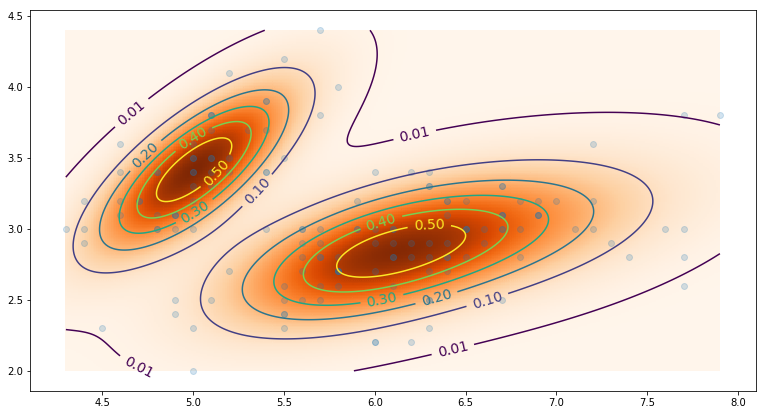

In [19]:
I = np.array([0, 1])  # это можно передавать в качестве индексов
grid = np.mgrid[features[0].min():features[0].max():0.01, features[1].min():features[1].max():0.01]
densities = np.array([sps.multivariate_normal.pdf(np.dstack((grid[0], grid[1])), mean[I], cov[I][:,I]) 
                    for mean, cov in zip(means, covs)])
density = densities.mean(axis=0)
#print(density)
plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(features[0], features[1], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.show()

Вычислите условное математическое ожидание $\mathsf{E}( X | I\{T \not= k\} = 1)$ для всех $k = 1,2,3$, где $X$ --- случайный вектор, имеющий распределение смеси.
Постройте графики условной плотности $p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right)$ в проекции на первые две координаты. Подберите хорошие значения линий уровня.

In [15]:
for i in range(0, 3):
    print("Для номера компонент %d: %f", i, np.count_nonzero(data.target == i)/len(data.target))

Для номера компонент %d: %f 0 0.3333333333333333
Для номера компонент %d: %f 1 0.3333333333333333
Для номера компонент %d: %f 2 0.3333333333333333


То есть для каждого значения $k$ получаем $\frac{1}{3}$.

Посчитаем матожидание для $k=1$, для $k=2, 3$ --- аналогично. 
$I_{T \ne 1}$ порождает $\sigma$-алгебру $\{\emptyset, \Omega, T \ne 1, \overline{T \ne 1}\}$, которая также порождается разбиением $\{ T \ne 1, T = 1\}$, а значит можно воспользоваться формулой для разбиений.
$\mathsf{E}( X | I\{T \not= k\}) = \frac{\mathsf{E}(XI_{T = 1})}{\mathsf{P}(T=1)}I_{T=1} + \frac{ \mathsf{E}(XI_{T \ne 1})}{\mathsf{P}(T \ne 1)}I_{T \ne 1} = 3 \mathsf{E}(XI_{T = 1}) (1-I_{T \ne 1}) + \frac{1}{2}(3 \mathsf{E}(XI_{T = 2}) + 3 \mathsf{E}(XI_{T = 3}) ) I_{T \ne 1} = a_1(1-I_{T \ne 1}) + \frac{1}{2}(a_2+a_3)I_{T \ne 1}$

$\mathsf{E}( X | I\{T \not= k\} = 1) = \frac{1}{2}(a_2+a_3)$

Условная плотность же $p_{X|I\{T \not= k\}}\left(x \left| y\right.\right) = p_k(x)(1-y)+ \frac{1}{2} \left(\sum\limits_{i\in \{1, 2, 3\} \setminus \{k\}} p_i(x)\right)y$

Построить требуется $p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right) = \frac{1}{2} \left(\sum\limits_{i\in \{1, 2, 3\} \setminus \{k\}} p_i(x)\right)$

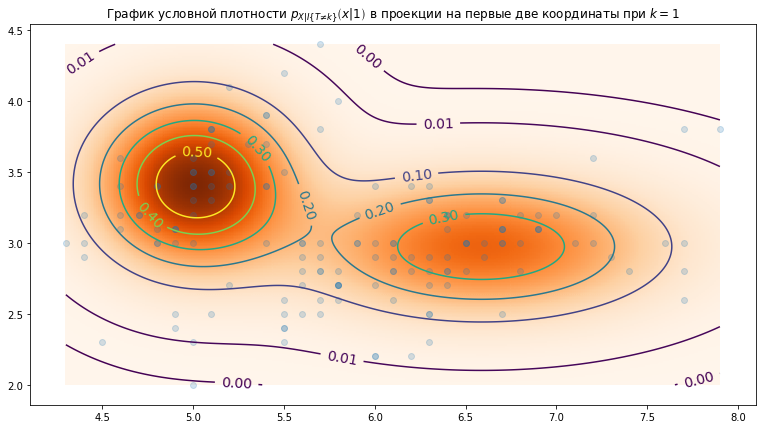

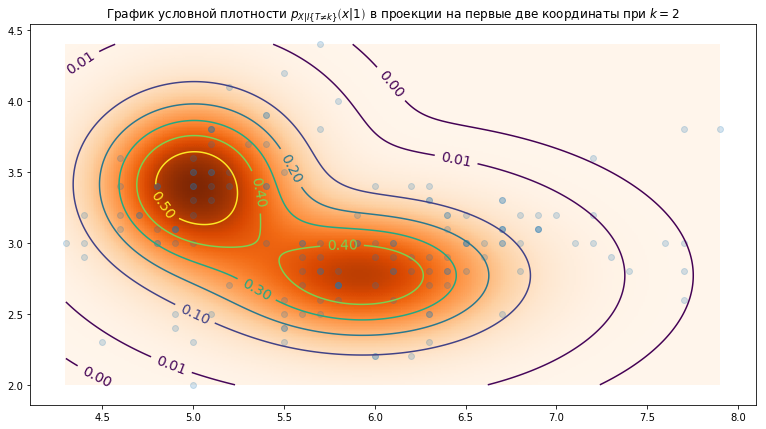

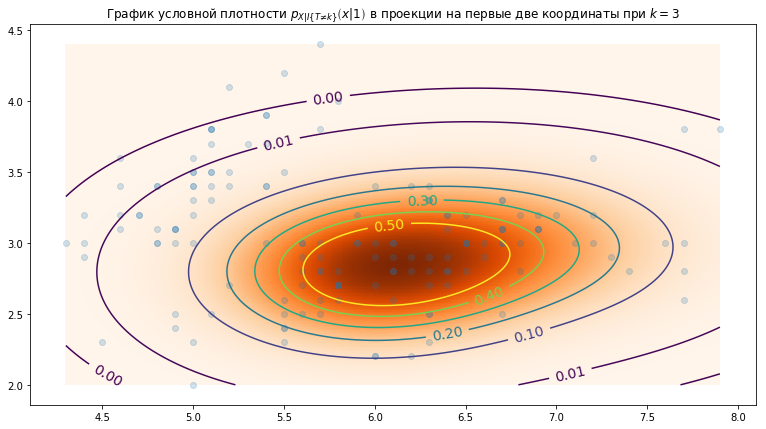

In [16]:
I = np.array([0, 1])  # это можно передавать в качестве индексов
grid = np.mgrid[features[0].min():features[0].max():0.01, features[1].min():features[1].max():0.01]

for k in range(1, 4):
    plt.figure(figsize=(13, 7))
    plt.title("График условной плотности $p_{X|I\\{T \\ne k\\}}\left(x \\left| 1\\right.\\right)$ в проекции на первые две координаты при $k=%d$"%k)
    density = 1/2*(densities[k-1]+densities[k-2])
    plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
    plt.scatter(features[0], features[1], alpha=0.2)
    CS = plt.contour(grid[0], grid[1], density, [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
    plt.show()

Классифицируйте все пространство по принципу $k = \text{arg}\max\limits_k p_{X|I\{T = k\}}\left(x \left| 1\right.\right)$.
Посчитайте долю ошибок на выборке.
Нарисуйте классификацию всего пространства в проекции на пары координат (0, 1), (1, 3) и (2, 3), где закрасьте разными цветами области, которые образовались в результате классификации.

Аналогично вышеприведённому, получаем:

$p_{X|I\{T = k\}}\left(x \left| y\right.\right) = p_k(x)y+ \frac{1}{2} \left(\sum\limits_{i\in \{1, 2, 3\} \setminus \{k\}} p_i(x)\right)(1-y)$

$p_{X|I\{T = k\}}\left(x \left| 1\right.\right) = p_k(x)$

In [17]:
pdfs = [sps.multivariate_normal(mean=mean, cov=cov).pdf
                    for mean, cov in zip(means, covs)]

argmax = lambda x : np.argmax([pdf(x) for pdf in pdfs])

error_count = 0
for x, k in zip(data.data, data.target):
    if argmax(x) != k:
        error_count += 1
print("Доля ошибок на выборке: %f"%(error_count/len(data.target)))

Доля ошибок на выборке: 0.020000


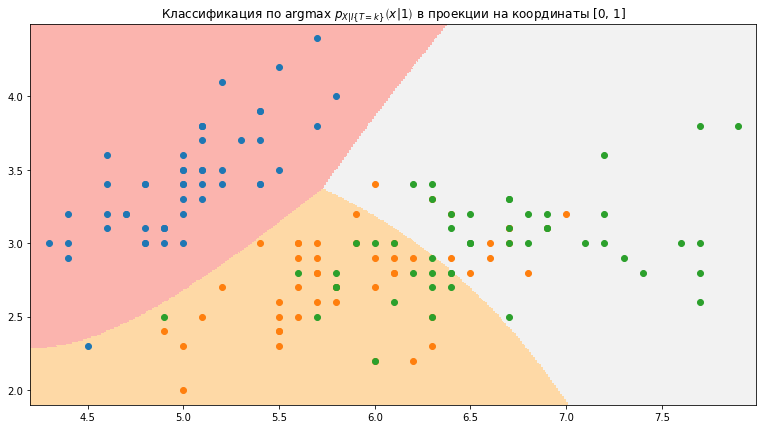

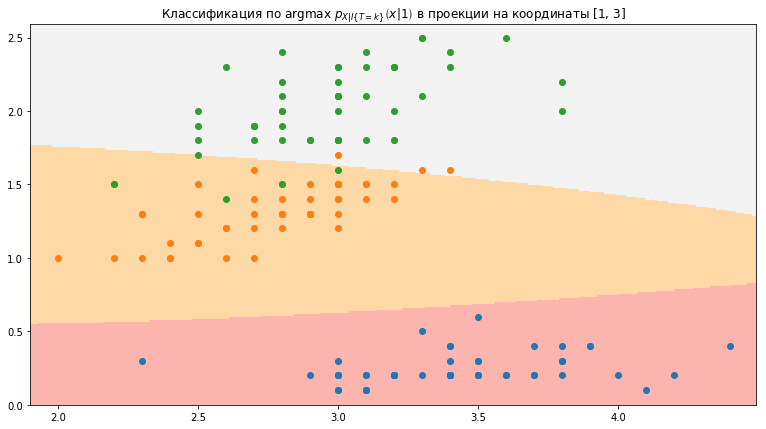

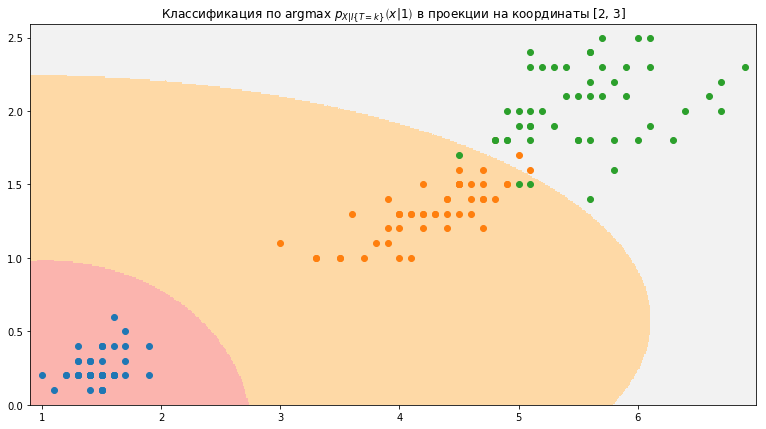

In [18]:
for i, I in enumerate([[0,1],[1,3],[2,3]]):
    plt.figure(figsize=(13, 7))
    plt.title("Классификация по argmax $p_{X|I\\{T = k\\}}\\left(x \\left| 1\\right.\\right)$ в проекции на координаты %s"%I)
    border=0.1
    grid = np.mgrid[data.data[:, I[0]].min()-border:data.data[:, I[0]].max()+border:0.01, 
                    data.data[:, I[1]].min()-border:data.data[:, I[1]].max()+border:0.01]
    pdfs = [sps.multivariate_normal(mean=mean[I], cov=cov[I, I]).pdf for mean, cov in zip(means, covs)]
    argmax = lambda x : np.argmax([pdf(x) for pdf in pdfs], axis=0)
    
    plt.pcolormesh(grid[0], grid[1], argmax(np.dstack((grid[0], grid[1]))), cmap='Pastel1')
    for j in range(0, 3):
        plt.scatter(data.data[data.target == j,I[0]], data.data[data.target == j,I[1]])
    plt.show()

**Вывод:** Приближение с помощью смеси гауссовских распределений оказалось довольно хорошим. Ошибка составила 2%. Если смотреть в проекциях на оси, то по осям (0, 1) было много ошибок, но это компенсировалось тем, что по другим осям их было мало.

**Задача 5<font size="5" color="red">\*</font>.** В предыдущей задача информация о принадлежности наблюдения конкретной компоненте смеси была известна заранее. Как выть в случае, если такой информации нет? Задача оценки параметров распределения смеси может быть решена с помощью иттерационного EM-алгоритма.

Опишите, как работает EM-алгоритм (это обязательное условие, при котором эта задача будет проверяться). Затем примените EM-алгоритм к Ирисам Фишера и к некоторым искусственно сгенерированным датасетам. Исследуйте, как результат зависит от параметров алгоритма. Сделайте вывод.

*Разобраться в EM-алгоритме помогут:*

https://basegroup.ru/community/articles/em

http://www.machinelearning.ru/wiki/index.php?title=%D0%95%D0%9C-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC

https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

Bishop, C.M. Pattern Recognition and Machine Learning, глава 9.

*Реализация EM-алгоритма для смеси гауссовских распределений:*

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture